# Underdeveloped Country Clustering using K Means

In this micro project, we will work with country data set which contains economy, health and social features of countries around the globe. We will build a K-Means Clustering model to predict/cluster, which underdeveloped countries are the most urgent and need to be helped by the NGO. As this is an unsupervised classification case, a K-Means Clustering model is well suited here.

The data used in this micro project is obtained from SanberCode Data Science training which is translated from a Kaggler:
https://www.kaggle.com/gauravduttakiit/help-international

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly as py
import plotly.graph_objs as go

sns.set()

## Data Loading

In [2]:
# Reading & Understanding Data
df = pd.read_csv("Data_Negara_HELP.csv")
df.head()

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Exploration

The data set contain following features:
- 'country': Name of the country.
- 'child_mortality': Death of children under 5 years of age per 1000 live births.
- 'exports': Exports of goods and services per capita. Given as %age of the GDP per capita.
- 'health': Total health spending per capita. Given as %age of GDP per capita.
- 'imports': Imports of goods and services per capita. Given as %age of the GDP per capita.
- 'income': Net income per person.
- 'inflation': The measurement of the annual growth rate of the Total GDP.
- 'life_expectancy': The average number of years a newborn child would live if the current mortality patterns are to remain the same.
- 'total_fertility': The number of children that would be born to each woman if the current age-fertility rates remain the same.
- 'gdpp': The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
print(df.shape)
df.info()

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Exploratory Data Analysis (EDA)

First, we look at the distribution of each feature of the data set using Univariate Analysis.

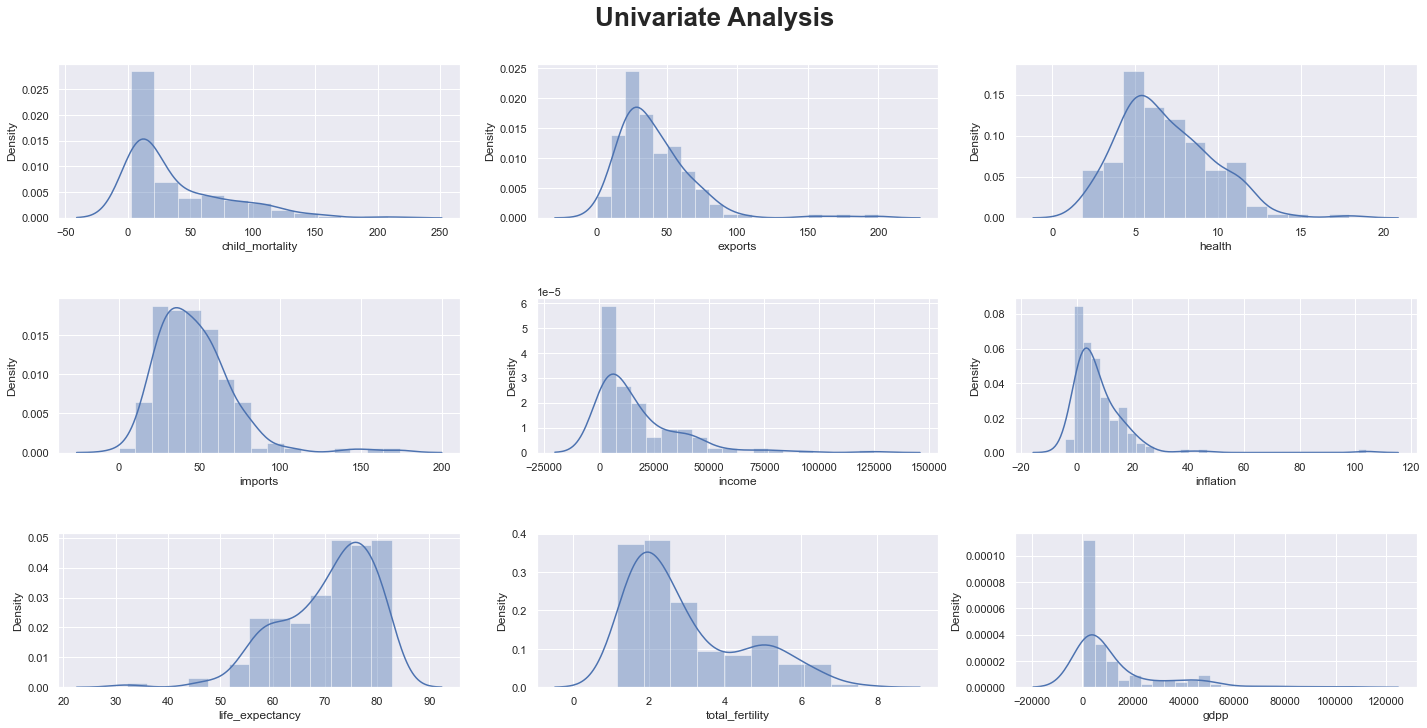

In [5]:
plt.figure(figsize=(20, 10))

for i in enumerate(df.describe().columns):
    plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])

plt.suptitle("Univariate Analysis",
             weight="bold",
             size=26,
             y=1.01)
plt.tight_layout(h_pad=3);

Based on univariate analysis, all of the feature's distribution is right-skewed except for life expectancy.

Second, we look at the relationship between:
- child_mortality, total_fertility and income
- income, life_expectancy and health
- child_mortality, life_expectancy and gdpp

using Bivariate Analysis.

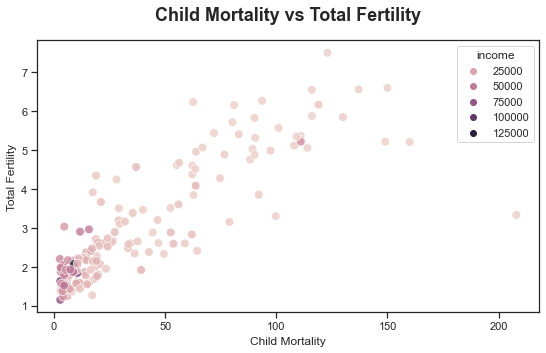

In [6]:
sns.set({"figure.figsize":(9, 5)})

with sns.axes_style(style="ticks"):
    sns.scatterplot(data=df,
                    x="child_mortality",
                    y="total_fertility",
                    hue="income",
                    s=75,
                    alpha=0.85)

plt.title("Child Mortality vs Total Fertility",
          fontweight="bold",
          size=18,
          pad=20)
plt.xlabel("Child Mortality")
plt.ylabel("Total Fertility");

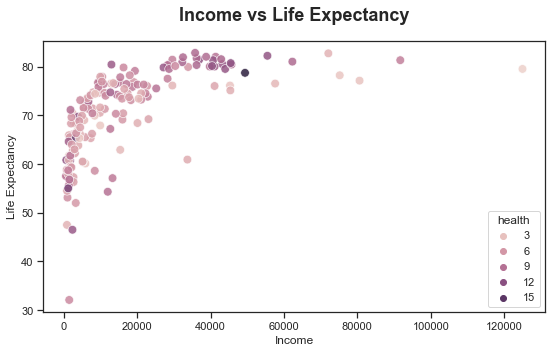

In [7]:
sns.set({"figure.figsize":(9, 5)})

with sns.axes_style(style="ticks"):
    sns.scatterplot(data=df,
                    x="income",
                    y="life_expectancy",
                    hue="health",
                    s=75,
                    alpha=0.85)

plt.title("Income vs Life Expectancy",
          fontweight="bold",
          size=18,
          pad=20)
plt.xlabel("Income")
plt.ylabel("Life Expectancy");

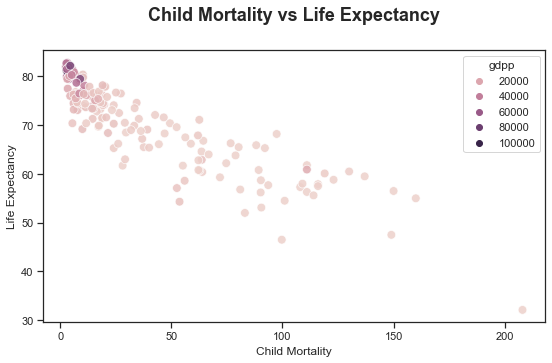

In [8]:
sns.set({'figure.figsize':(9, 5)})

with sns.axes_style(style="ticks"):
    sns.scatterplot(data=df,
                    x="child_mortality",
                    y="life_expectancy",
                    hue="gdpp",
                    s=75,
                    alpha=0.85)

plt.title("Child Mortality vs Life Expectancy",
          fontweight=
          "bold",
          size=18,
          pad=30)
plt.xlabel("Child Mortality")
plt.ylabel("Life Expectancy");

Based on bivariate analysis, the relationship between child mortality and total fertility is directly proportional, while countries with higher income tend to have low child mortality and total fertility value.
The relationship between income and life expectancy is directly proportional too, while total health spending per capita of a country does not affect income and life expectancy value.
The relationship between child mortality and life expectancy is inversely proportional, while countries with higher GDP per capita tend to have high life expectancy but low child mortality value.

Third, we look at the correlation between each feature of the data set using Multivariate Analysis.

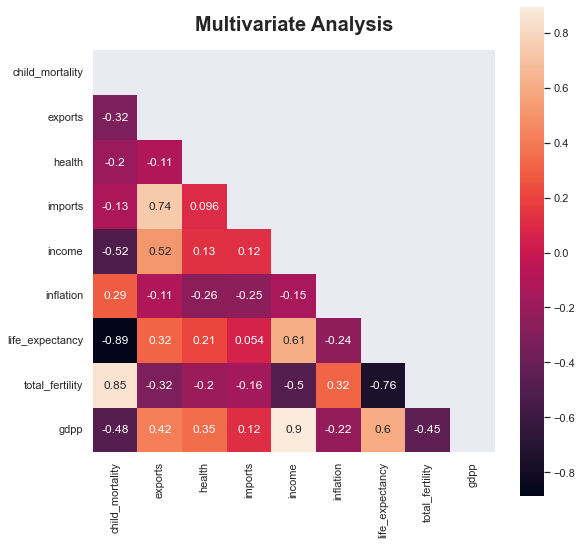

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(9, 9))
sns.heatmap(corr,
            annot=True,
            fmt='.2g',
            mask=mask,
            square=True)
plt.title("Multivariate Analysis",
          fontweight="bold",
          size=20,
          pad=20);

Based on multivariate analysis, features that have high positive correlation is:
- income and gdpp (0.9)
- child mortality and total fertility (0.85)
- exports and imports (0.74).

Features that have high negative correlation is:
- child mortality and life expectancy (-0.89)
- life expectancy and total fertility (-0.76)
- child mortality and income (-0.52)

Features that does not have correlation is:
- imports and life expectancy (0.054)
- health and imports (0.096)
- exports and inflation / health (-0.11)

## Data Preprocessing

Before we build a model, we have to ensure our data set is clean and ready to be modelled. That is why we need to do data preprocessing.

First, we are going to check for the existence of missing values.

In [10]:
df.isnull().sum()

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Next, we choose features to be used in the model simply based on multivariate analysis results that has high correlation no matter it is a positive or negative correlation.

In [11]:
df1 = df[["country", "life_expectancy", "total_fertility", "child_mortality", "income", "gdpp", "inflation"]].copy()
display(df1.head())
print(df1.shape)

,country,life_expectancy,total_fertility,child_mortality,income,gdpp,inflation
0,Afghanistan,56.2,5.82,90.2,1610,553,9.44
1,Albania,76.3,1.65,16.6,9930,4090,4.49
2,Algeria,76.5,2.89,27.3,12900,4460,16.10
3,Angola,60.1,6.16,119.0,5900,3530,22.40
4,Antigua and Barbuda,76.8,2.13,10.3,19100,12200,1.44


(167, 7)


Next, we do outlier check using boxplot.

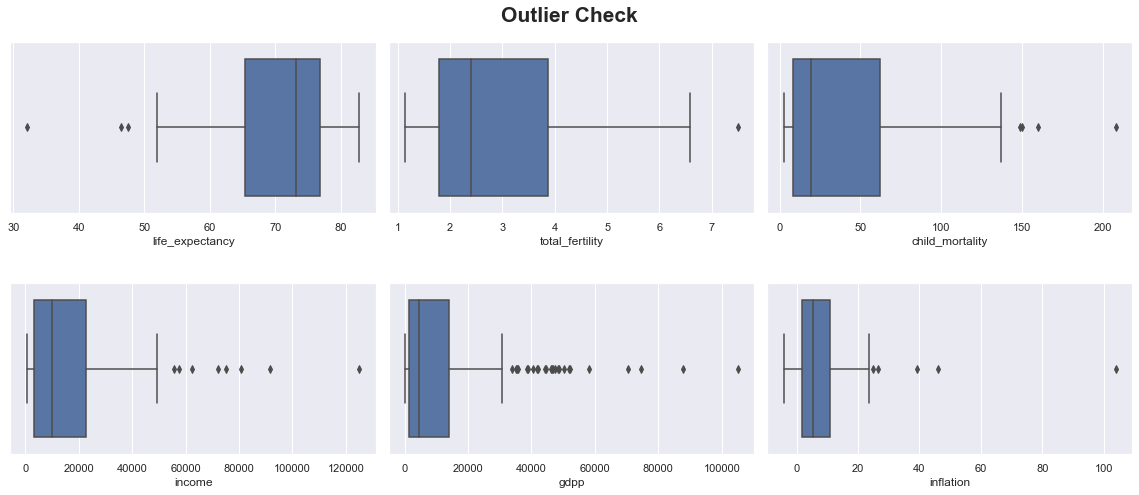

In [12]:
plt.figure(figsize=(16, 7))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df1, x=df1.columns[i])

plt.suptitle("Outlier Check",
             weight="bold",
             size=21)
plt.tight_layout(h_pad=3);

From the outlier check result, we found out there are outliers in our data set. So we must do outlier treatment / removals, except for:
- Life expectancy, because we want to select countries that have low value of life expectancy.
- Total fertility, because there is no outlier.
- Child mortality, because we want to select countries that have high value of child mortality.

In [13]:
def remove_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - iqr * 1.5
    up_bound = q3 + iqr * 1.5
    df_clean = df[~(df > low_bound) | (df < up_bound)]
    return df_clean

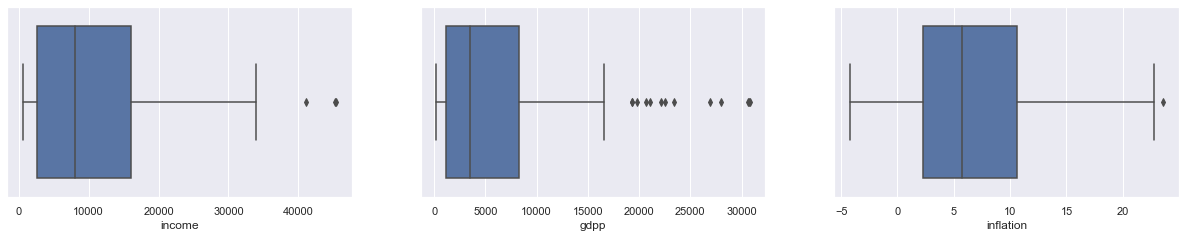

In [14]:
remove = ["country", "income", "gdpp", "inflation"]
df2 = remove_outlier(df1[remove])
df2.dropna(inplace=True)

plt.figure(figsize = (21, 3.5))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df2, x=remove[i]);

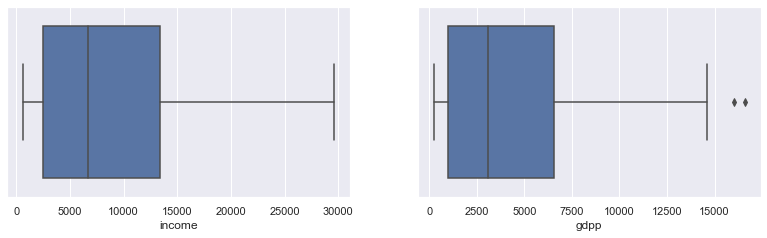

In [15]:
remove1 = ["country", "income", "gdpp"]
df3 = remove_outlier(df2[remove1])
df3.dropna(inplace=True)

plt.figure(figsize=(13.5, 3.5))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    sns.boxplot(data = df3, x = remove1[i]);

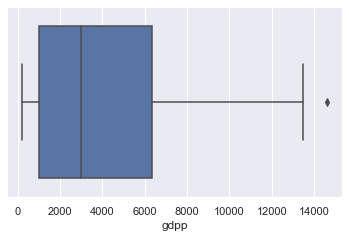

In [16]:
remove2 = ["country", "gdpp"]
df4 = remove_outlier(df3[remove2])
df4.dropna(inplace=True)

plt.figure(figsize=(6, 3.5))
sns.boxplot(data=df4, x="gdpp");

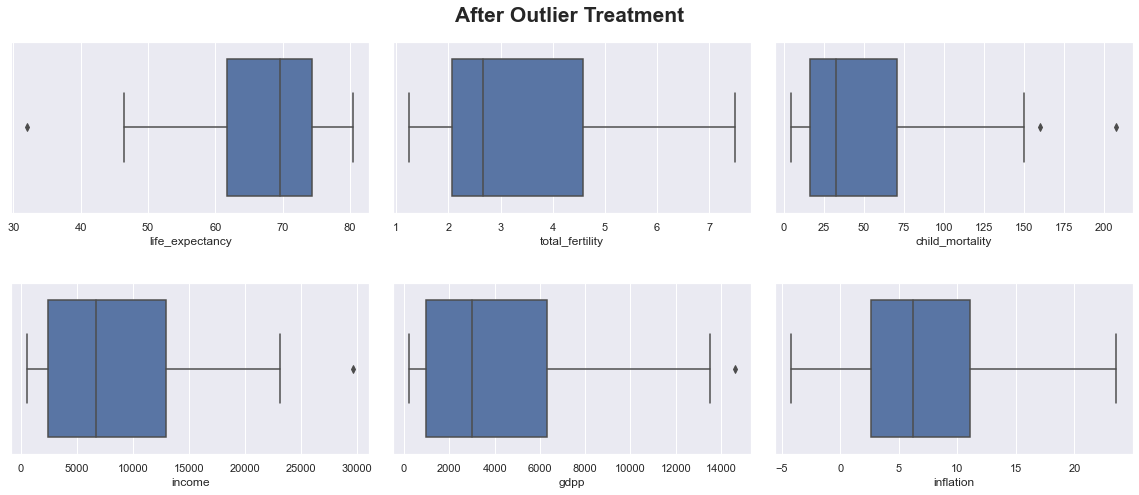

In [17]:
dframe = [df1, df2, df3, df4]
dfs = reduce(lambda left, right: pd.merge(left, right, on=["country"], suffixes=('', '_drop')), dframe)
dfs.drop([i for i in dfs.columns if "drop" in i], axis=1, inplace=True)

plt.figure(figsize = (16, 7))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dfs, x=dfs.columns[i])

plt.suptitle("After Outlier Treatment",
             weight="bold",
             size=21)
plt.tight_layout(h_pad=3);

Now the data set is clean and ready to be modelled.

## Model Building

First, we need to standardize the data set by scaling all the value so every feature has a similar ratio.

In [18]:
dfs_ = dfs.drop(["country"], axis=1)
sc = StandardScaler()
df_std = sc.fit_transform(dfs_)

In order to get the optimal number of clusters, we use Elbow method and Silhouette analysis.

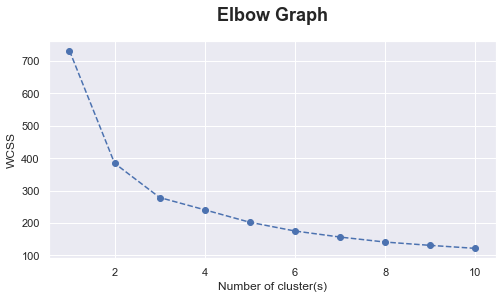

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11),
         wcss,
         marker="o",
         linestyle="--")
plt.xlabel("Number of cluster(s)")
plt.ylabel("WCSS")
plt.title("Elbow Graph",
          fontweight="bold",
          size=18,
          pad=20);

Based on Elbow graph, the optimal number of clusters is at the point where the inclination angle is starting to not steep, that is around 3 to 5.

In [23]:
# Silhouette analysis
range_n_cluster = [3, 4, 5]
for i in range_n_cluster:
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_std)

    score = silhouette_score(df_std, preds)
    print("For number of cluster {}, the Silhouette score is {}".format(i, score))

For number of cluster 3, the Silhouette score is 0.32357505925335184
For number of cluster 4, the Silhouette score is 0.33484522994986493
For number of cluster 5, the Silhouette score is 0.3170400798771914


Based on the Silhouette score, the optimal number of clusters is 4. Now it is time to make prediction / clustering.

## Making Prediction

In [24]:
k = 4
kmeans1 = KMeans(n_clusters=k, random_state=42).fit(df_std)
cluster = kmeans1.labels_
centers = kmeans1.cluster_centers_

dfs["cluster"] = cluster
dfs.head()

,country,life_expectancy,total_fertility,child_mortality,income,gdpp,inflation,cluster
0,Afghanistan,56.2,5.82,90.2,1610,553,9.44,0
1,Albania,76.3,1.65,16.6,9930,4090,4.49,2
2,Algeria,76.5,2.89,27.3,12900,4460,16.10,2
3,Angola,60.1,6.16,119.0,5900,3530,22.40,3
4,Antigua and Barbuda,76.8,2.13,10.3,19100,12200,1.44,1


Export the prediction / clustering result to CSV file.

In [25]:
dfs.to_csv("Data_Negara_Cluster.csv", index=False)

Based on the prediction result, the countries candidates are in cluster 0 and 3.

In [26]:
countries = dfs.loc[(cluster == 0) | (cluster == 3)].copy()
countries.describe()

,life_expectancy,total_fertility,child_mortality,income,gdpp,inflation,cluster
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,58.88750,5.147000,95.612500,2671.325000,1184.050000,9.537375,1.125000
std,6.62134,0.892663,33.434599,2932.114625,1495.548865,6.909672,1.470871
min,32.10000,3.300000,36.900000,609.000000,231.000000,0.885000,0.000000
25%,56.45000,4.607500,70.625000,1317.500000,486.500000,3.645000,0.000000
50%,59.40000,5.085000,90.400000,1695.000000,705.000000,8.215000,0.000000
75%,62.82500,5.597500,111.750000,2782.500000,1242.500000,16.225000,3.000000
max,68.20000,7.490000,208.000000,15400.000000,8750.000000,23.600000,3.000000


To narrow down the most urgent and need to be helped, we select the countries that have feature values under average.

In [27]:
life_avg = countries.describe()["life_expectancy"]["mean"]
fertility_avg = countries.describe()["total_fertility"]["mean"]
mortality_avg = countries.describe()["child_mortality"]["mean"]
income_avg = countries.describe()["income"]["mean"]
gdpp_avg = countries.describe()["gdpp"]["mean"]
inflation_avg = countries.describe()["inflation"]["mean"]

In [28]:
countries.loc[(dfs.life_expectancy <= life_avg)
              & (dfs.total_fertility <= fertility_avg)
              & (dfs.child_mortality >= mortality_avg)
              & (dfs.income <= income_avg)
              & (dfs.gdpp <= gdpp_avg)
              & (dfs.inflation <= inflation_avg)]

,country,life_expectancy,total_fertility,child_mortality,income,gdpp,inflation,cluster
48,Guinea-Bissau,55.6,5.05,114.0,1390,547,2.97,0
50,Haiti,32.1,3.33,208.0,1500,662,5.45,0
65,Lesotho,46.5,3.30,99.7,2380,1170,4.15,0


## Result Analysis

Based on the prediction and narrowed down result, we get 3 countries that are the most urgent and need to be helped by the NGO. These countries are:
1. 'Guinea-Bissau', which is the lowest income, gdpp, and inflation, but has the highest life expectancy and total fertility.
2. 'Haiti', which is the lowest life expectancy and the highest child mortality, but has the highest inflation.
3. 'Lesotho', which is the lowest total fertility, but the lowest child mortality and has the highest income and gdpp.